### Install Required Packages

In [1]:
!pip install openai groq python-dotenv diffusers transformers accelerate torch

### Load Environment Variables from .env

In [2]:
import os
from dotenv import load_dotenv

load_dotenv()
GROQ_API_KEY = os.getenv("GROQ_API_KEY")

if not GROQ_API_KEY:
    raise ValueError("Groq API key not found in .env file")


###  LLM Prompt Rewriting using Groq API (LLama3-8B)

In [3]:
from openai import OpenAI

client = OpenAI(
    api_key=GROQ_API_KEY,
    base_url="https://api.groq.com/openai/v1"
)

def enhance_prompt(user_prompt):
    system_prompt = (
        "You are a prompt enhancer for an AI image generator. Rewrite the user's prompt "
        "to maximize visual richness, realism, detailed background, and likeness to any person, "
        "character, or place. The output should describe clear facial features, outfit, lighting, "
        "camera angle, mood, environment, and art style."
    )

    response = client.chat.completions.create(
        model="llama3-8b-8192",
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_prompt}
        ],
        temperature=0.7
    )

    return response.choices[0].message.content.strip()


### Stable Diffusion Model Setup 

In [4]:
from diffusers import StableDiffusionPipeline
import torch

pipe = StableDiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1-base",
    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32
)
pipe = pipe.to("cuda" if torch.cuda.is_available() else "cpu")


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

### Function: Generate Image from Prompt

In [5]:
def generate_image(prompt, width=768, height=576):
    image = pipe(prompt, height=height, width=width).images[0]
    return image


### Full Chatbot Flow

In [6]:
def chatbot_generate(user_prompt):
    print("🔁 Enhancing prompt using Groq...")
    enhanced = enhance_prompt(user_prompt)
    print(f"✅ Enhanced Prompt:\n{enhanced}")

    print("\n🎨 Generating image with Stable Diffusion...")
    image = generate_image(enhanced)
    return image


### Test the Chatbot

🔁 Enhancing prompt using Groq...


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['carrying a colorful umbrella to shield themselves from the downpour . the rain - kissed streets are awash with puddles of water , creating a mesmerizing play of reflections and ripples across the dark , polished surface . in the foreground , a young woman with short , spiky hair and piercing green eyes , dressed in a black leather jacket and ripped jeans , walks purposefully down the street , her eyes fixed intently on the horizon . her features are sharp and angular , with high cheekbones and a small nose ring . she wears a silver necklace with a pendant shaped like a miniature robotic arm . the camera angle is low and cinematic , capturing the towering skyscrapers and neon billboards that dominate the skyline . the lighting is a mix of warm and cool tones , with the golden dawn light casting long shadows across the wet pavement . the mood is one of urgency and intensity , as if th

✅ Enhanced Prompt:
Here's a rewritten prompt to enhance the visual richness and realism of the AI image generator:

"A dystopian cyberpunk cityscape at dawn, where the neon-drenched streets are bathed in a warm, golden light as the rain-soaked pavement reflects the vibrant hues of the city's towering skyscrapers. People of diverse ages and styles hurry along the wet sidewalks, each carrying a colorful umbrella to shield themselves from the downpour. The rain-kissed streets are awash with puddles of water, creating a mesmerizing play of reflections and ripples across the dark, polished surface.

In the foreground, a young woman with short, spiky hair and piercing green eyes, dressed in a black leather jacket and ripped jeans, walks purposefully down the street, her eyes fixed intently on the horizon. Her features are sharp and angular, with high cheekbones and a small nose ring. She wears a silver necklace with a pendant shaped like a miniature robotic arm.

The camera angle is low and 

  0%|          | 0/50 [00:00<?, ?it/s]

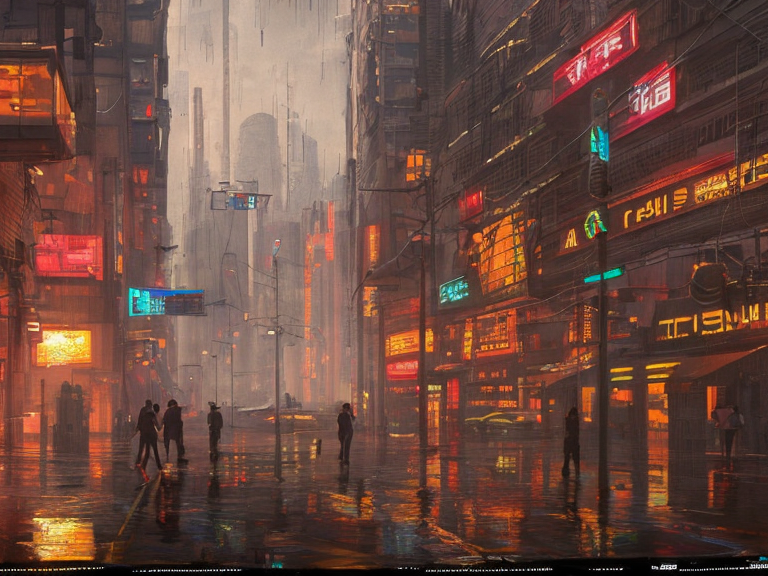

In [11]:
from IPython.display import display

test_prompt = "Cyberpunk city at dawn, neon-lit streets, rainy ground reflecting lights, people walking with umbrellas, 3D render style"
output_image = chatbot_generate(test_prompt)
display(output_image)